In [1]:
import pandas as pd
import numpy as np

In [26]:
df_falcons_sales = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/titans_sales_updated.csv')
df_falcons_sales.head()

,DATE,REGION,COUNTRY,SALESORG,SILHOUETTE,GENDER,SPORT,ACTUAL_SALES,FORECAST_P50,FORECAST_P05,FORECAST_P95,CI_LOWER,CI_UPPER,CI_WIDTH,FORECAST_YEAR
0,2025-01-01,EMEA,Germany,Others,940,Male,Others,6110.0,7193.628874,5941.799986,8197.389182,5941.799986,8197.389182,2255.589196,2025
1,2025-01-01,EMEA,Germany,Others,940,Male,SP-None,150.0,169.716767,137.747122,445.570535,137.747122,445.570535,307.823413,2025
2,2025-01-01,EMEA,Germany,Others,Others,Male,Others,13585.0,16745.558649,13574.151073,18986.247756,13574.151073,18986.247756,5412.096684,2025
3,2025-01-01,EMEA,Germany,Others,Others,Male,SP-None,400.0,1222.658138,391.833372,2127.576638,391.833372,2127.576638,1735.743266,2025
4,2025-01-01,EMEA,United Kingdom,EMEA,3930,Male,Baseball,18039.0,17569.620765,17487.900479,19018.811860,17487.900479,19018.811860,1530.911381,2025


In [20]:
df_falcons_sales = df_falcons_sales.rename(columns={'DATE':'MONTH_START','ACTUAL_SALES':'actual', 'FORECAST_P50':'predicted', 'SALESORG':'SALES_ORG'})
df_falcons_sales = df_falcons_sales.drop(columns=['CI_LOWER','CI_UPPER','CI_WIDTH','FORECAST_YEAR'])
dec_mask = df_falcons_sales['MONTH_START'] == '2025-12-01'
df_falcons_sales.loc[dec_mask, 'actual'] = np.nan
df_falcons_sales.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_2025-2028_updated.csv', index=False)
df_falcons_sales.head()

,MONTH_START,REGION,COUNTRY,SALES_ORG,SILHOUETTE,GENDER,SPORT,actual,predicted,FORECAST_P05,FORECAST_P95
0,2025-01-01,EMEA,Germany,Others,940,Male,Others,6110.0,7193.628874,5941.799986,8197.389182
1,2025-01-01,EMEA,Germany,Others,940,Male,SP-None,150.0,169.716767,137.747122,445.570535
2,2025-01-01,EMEA,Germany,Others,Others,Male,Others,13585.0,16745.558649,13574.151073,18986.247756
3,2025-01-01,EMEA,Germany,Others,Others,Male,SP-None,400.0,1222.658138,391.833372,2127.576638
4,2025-01-01,EMEA,United Kingdom,EMEA,3930,Male,Baseball,18039.0,17569.620765,17487.900479,19018.811860


In [27]:
df_sales = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_2025-2028_updated.csv')
df_sales_test = df_sales[df_sales['MONTH_START'] == '2025-11-01']
df_sales_test

,MONTH_START,REGION,COUNTRY,SALES_ORG,SILHOUETTE,GENDER,SPORT,actual,predicted,FORECAST_P05,FORECAST_P95
6393,2025-11-01,EMEA,Germany,Others,3930,Male,Baseball,NaN,721.345122,690.385337,943.675661
6394,2025-11-01,EMEA,Germany,Others,3930,Male,SP-None,NaN,602.199311,690.299463,951.595261
6395,2025-11-01,EMEA,Germany,Others,5950,Male,Baseball,NaN,834.880763,690.508427,942.369911
6396,2025-11-01,EMEA,Germany,Others,5950,Male,Basketball,NaN,911.035924,690.298439,949.428358
6397,2025-11-01,EMEA,Germany,Others,5950,Male,Football,NaN,747.607867,690.085330,950.350328
...,...,...,...,...,...,...,...,...,...,...,...
7282,2025-11-01,North America,USA,United States,Others,Others,Basketball,NaN,3466.248401,219.973499,5901.961382
7283,2025-11-01,North America,USA,United States,Others,Others,College,NaN,1760.361954,839.134960,1401.025684
7284,2025-11-01,North America,USA,United States,Others,Others,Football,NaN,4801.342892,4694.039744,5829.260154
7285,2025-11-01,North America,USA,United States,Others,Others,Others,NaN,3471.260161,360.868459,6289.185287


,REGION,COUNTRY,SALESORG,SILHOUETTE,GENDER,SPORT,SEASON,YEAR,MONTH,DATE,FORECAST,ACTUAL_PURCHASE
0,EMEA,Germany,German,Apparel,Male,Others,Program,2025,8,2025-08-01,461.342397,1435.0
1,EMEA,Germany,German,Apparel,Male,Others,Program,2026,1,2026-01-01,461.599270,NaN
2,EMEA,Germany,German,Apparel,Male,Others,Program,2026,2,2026-02-01,1518.658708,NaN
3,EMEA,Germany,German,Apparel,Male,Others,Program,2026,3,2026-03-01,1461.426356,NaN
4,EMEA,Germany,German,Apparel,Male,Others,Program,2026,4,2026-04-01,735.237933,NaN


In [5]:
df_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_purchase_updated.csv')
df_purchase.head(1)

,REGION,COUNTRY,SALESORG,SILHOUETTE,GENDER,SPORT,SEASON,YEAR,MONTH,DATE,FORECAST_PURCHASE,ACTUAL_PURCHASE,CI_LOWER,CI_UPPER
0,EMEA,Germany,German,3930,Men,Others,Custom,2026,1,2026-01-01,258.865623,NaN,0.0,1238.847615


In [34]:
df_purchase['COUNTRY'].unique()

array(['DE : Germany', 'GB : United Kingdom', 'AU : Australia',
       'CN : China', 'HK : Hong Kong', 'KR : South Korea', 'MX : Mexico',
       'NZ : New Zealand', 'US : USA', 'JP : Japan', 'CA : Canada'],
      dtype=object)

In [23]:
df_titans_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_purchase_updated.csv')
df_titans_purchase = df_titans_purchase.rename(columns={'DATE':'PO_CREATED_DATE', 'SALEORG': 'SALES_ORG_NAME','SEASON':'SEASON_CONSOLIDATION','SPORT':'SPORT_UPDATED','SILHOUETTE':'SILHOUETTE_UPDATED','ACTUAL_PURCHASE':'ORDERED_QUANTITY','FORECAST_PURCHASE':'predicted','CI_LOWER':'FORECAST_P05','CI_UPPER':'FORECAST_P95'})
df_titans_purchase = df_titans_purchase.drop(columns=['YEAR','MONTH'])
dec_mask = df_titans_purchase['PO_CREATED_DATE'] == '2025-12-01'
df_titans_purchase.loc[dec_mask, 'ORDERED_QUANTITY'] = np.nan


In [25]:
df_titans_purchase.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028_updated.csv',index=False)

In [ ]:
df_titans_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/purchase_forecast_temp.csv')
df_titans_purchase['FORECAST_P05'] = df_titans_purchase['predicted']*0.80
df_titans_purchase['FORECAST_P95'] = df_titans_purchase['predicted']*1.20

In [32]:
df_titans_purchase.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028.csv',index=False)

In [50]:
df_titans_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028.csv')
df_titans_purchase = df_titans_purchase[df_titans_purchase['SALESORG'] != 'Unknown']

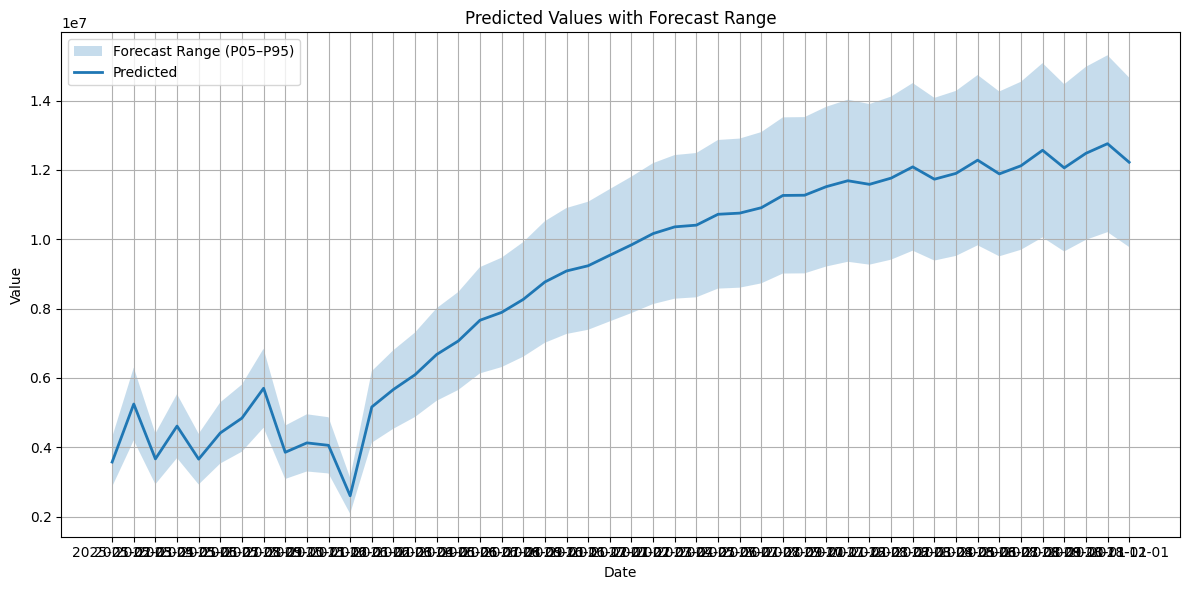

In [51]:
df_plot = df_titans_purchase.groupby('PO_CREATED_DATE').agg({
    'predicted': 'sum',
    'FORECAST_P05': 'sum',
    'FORECAST_P95': 'sum'
}).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Shaded confidence interval
plt.fill_between(
    df_plot['PO_CREATED_DATE'],
    df_plot['FORECAST_P05'],
    df_plot['FORECAST_P95'],
    alpha=0.25,
    label='Forecast Range (P05–P95)'
)

# Predicted line
plt.plot(
    df_plot['PO_CREATED_DATE'],
    df_plot['predicted'],
    label='Predicted',
    linewidth=2
)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Predicted Values with Forecast Range")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
df_titans_purchase.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028.csv',index=False)

In [43]:
df_titans_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/purchase_forecast_temp.csv')
df_titans_purchase['SALESORG'].unique()

array(['German', 'EMEA', 'EMEA Web', '47 Australia', 'Australia', 'China',
       'NEC China Shanghai', 'Southeast Asia', 'Mexico', '47 New Zealand',
       'New Zealand', 'South Korea', 'Latin America', '47 Japan', 'Japan',
       'Canada', '5th & Ocean', 'US Retail', 'United States', 'Unknown'],
      dtype=object)

In [ ]:
df_titans_purchase = df_titans_purchase['SALES']

,REGION,COUNTRY,SALESORG,SILHOUETTE,GENDER,SPORT,SEASON,YEAR,MONTH,DATE,FORECAST,ACTUAL_PURCHASE
0,EMEA,Germany,German,Apparel,Male,Others,Program,2025,8,2025-08-01,461.342397,1435.0


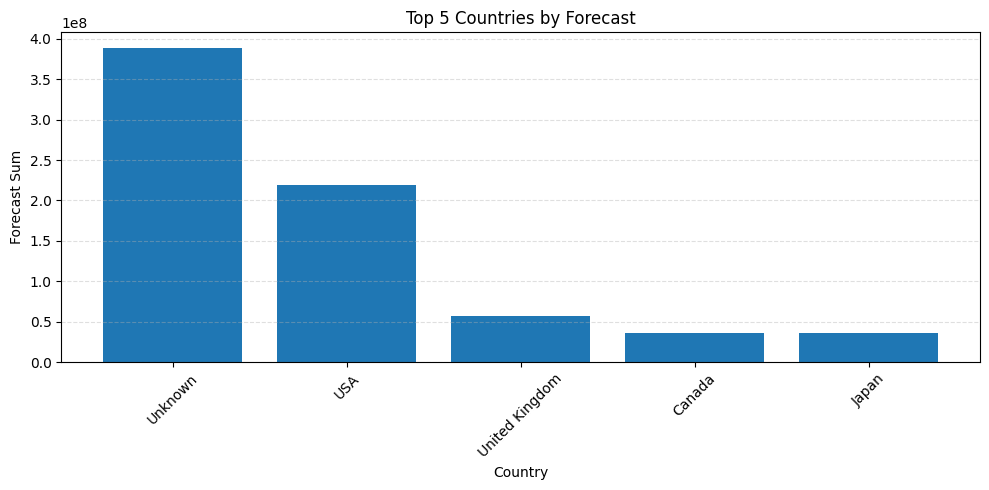

In [ ]:
df_country = df_titans_purchase.groupby('COUNTRY')['FORECAST'].sum().reset_index()
top5 = df_country.sort_values('FORECAST', ascending=False).head(5)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.bar(top5['COUNTRY'], top5['FORECAST'])

plt.title("Top 5 Countries by Forecast")
plt.xlabel("Country")
plt.ylabel("Forecast Sum")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [53]:
df_titans_historical_purchase = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv')
df_titans_historical_purchase.head()

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
0,Emerging Markets,South Korea,South Korea,S-5950,Headwear,Male,SP-None,Program,5,2020,180.0
1,Emerging Markets,South Korea,South Korea,S-5950,Headwear,Male,Basketball,Program,12,2020,72.0
2,Emerging Markets,South Korea,South Korea,S-950,Headwear,Male,Baseball,Program,4,2013,700.0
3,North America,USA,United States,S-920,Headwear,Others,SP-None,Custom,11,2017,1.0
4,EMEA,United Kingdom,EMEA,Others,Headwear,Others,Baseball,Program,7,2019,144.0


# Historical

In [ ]:
import pandas as pd
df_hist = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv')
df_hist["SILHOUETTE"] = df_hist["SILHOUETTE"].str.replace(r"^[sS]-", "", regex=True)
df_hist["SPORT"] = df_hist["SPORT"].str.replace(r"SP-None", "Others", regex=True)
df_hist["SEASON"] = df_hist["SEASON"].str.replace(r"UNASSIGNED", "Others", regex=True)
df_hist.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv', index=False)
df_hist.head(2)

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
0,Emerging Markets,South Korea,South Korea,5950,Headwear,Male,Others,Program,5,2020,180.0
1,Emerging Markets,South Korea,South Korea,5950,Headwear,Male,Basketball,Program,12,2020,72.0


In [61]:
import pandas as pd
df_hist = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv')
df_hist = df_hist.drop(columns=['Unnamed: 0'])
df_hist.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv', index=False)

In [42]:
df_filter_hist = df_hist[(df_hist['REGION'] == 'North America') & (df_hist['COUNTRY'] == 'USA') & (df_hist['SILHOUETTE'] == '5950')]
df_filter_hist.head(1)

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
125,North America,USA,United States,5950,Headwear,Male,Football,Program,10,2017,1.0


In [44]:
categorical_cols = [
    "SPORT",
    "SEASON",
    "GENDER",
    "SILHOUETTE"
]
for features in categorical_cols:
    print(features, df_filter_hist[features].unique())

SPORT ['Football' 'College' 'Others' 'Baseball' 'Basketball']
SEASON ['Program' 'Stock' 'Custom' 'Others']
GENDER ['Male' 'Others' 'Boys']
SILHOUETTE ['5950']


In [55]:
import pandas as pd
import numpy as np

def build_driver_summary(
    df: pd.DataFrame,
    categorical_features: list,
    target_col: str = "PURCHASE_COUNT"
):
    """
    Builds an LLM-friendly driver summary from historical data.
    
    Parameters
    ----------
    df : pd.DataFrame
        Historical dataset
    categorical_features : list
        List of categorical column names (e.g. ['SPORT','SEASON','GENDER'])
    target_col : str
        Target variable (default = PURCHASE_COUNT)

    Returns
    -------
    dict
        Compact driver summary for LLM consumption
    """

    summary_grp = {}
    summary_main = {}
    total_demand = df[target_col].sum()

    
    for feature in categorical_features:
        
        grp = (
            df.groupby(feature)[target_col]
            .sum()
            .reset_index()
        )
        grp = grp[grp[feature] != 'Others']
        
        feature_values = grp[feature].unique()

        for grp_val in feature_values:
            grp_df = grp[grp[feature] == grp_val]

            avg_val = grp_df[target_col].mean()
            std_val = grp_df[target_col].std()
            share_pct = (grp_df[target_col].sum() / total_demand) * 100

            # Relative strength (based on share of demand)
            if share_pct > 60:
                strength = "high"
            elif share_pct > 25:
                strength = "medium"
            else:
                strength = "low"
            
            # Variation (coefficient of variation)
            cv = std_val / avg_val if avg_val > 0 else 0
            if cv > 1:
                variation = "high"
            elif cv > 0.4:
                variation = "medium"
            else:
                variation = "low"

            
            summary_grp[grp_val] = {
                "avg_purchase": round(float(avg_val), 2),
                "share_of_demand_pct": round(float(share_pct), 1),
                "relative_strength": strength,
                "variation": variation
            }
        summary_main[feature] = summary_grp

    return summary_main


In [56]:
categorical_cols = [
    "SPORT",
    "SEASON",
    "GENDER",
    "SILHOUETTE"
]

driver_summary = build_driver_summary(
    df=df_filter_hist,
    categorical_features=categorical_cols,
    target_col="PURCHASE_COUNT"
)
driver_summary

{'SPORT': {'Baseball': {'avg_purchase': 85465986.0,
   'share_of_demand_pct': 66.0,
   'relative_strength': 'high',
   'variation': 'low'},
  'Basketball': {'avg_purchase': 6211996.0,
   'share_of_demand_pct': 4.8,
   'relative_strength': 'low',
   'variation': 'low'},
  'College': {'avg_purchase': 4339205.0,
   'share_of_demand_pct': 3.4,
   'relative_strength': 'low',
   'variation': 'low'},
  'Football': {'avg_purchase': 13772135.0,
   'share_of_demand_pct': 10.6,
   'relative_strength': 'low',
   'variation': 'low'},
  'Custom': {'avg_purchase': 98766098.0,
   'share_of_demand_pct': 76.3,
   'relative_strength': 'high',
   'variation': 'low'},
  'Program': {'avg_purchase': 17072404.0,
   'share_of_demand_pct': 13.2,
   'relative_strength': 'low',
   'variation': 'low'},
  'Stock': {'avg_purchase': 13520875.0,
   'share_of_demand_pct': 10.4,
   'relative_strength': 'low',
   'variation': 'low'},
  'Boys': {'avg_purchase': 1401.0,
   'share_of_demand_pct': 0.0,
   'relative_strength'

# Fix Purchase Nov Data

In [33]:
df = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028_updated.csv')
df.head(2)

,REGION,COUNTRY,SALESORG,SILHOUETTE_UPDATED,GENDER,SPORT_UPDATED,SEASON_CONSOLIDATION,PO_CREATED_DATE,predicted,ORDERED_QUANTITY,FORECAST_P05,FORECAST_P95
0,EMEA,Germany,German,3930,Men,Others,Custom,2026-01-01,258.865623,NaN,0.0,1238.847615
1,EMEA,Germany,German,3930,Men,Others,Custom,2026-02-01,62.982751,NaN,0.0,1042.964743


In [34]:
mask_nov = df['PO_CREATED_DATE'] == '2025-11-01'

In [35]:
df.loc[mask_nov,'ORDERED_QUANTITY'] = np.nan

In [36]:
mask_nov = df[df['PO_CREATED_DATE'] == '2025-11-01']
mask_nov

,REGION,COUNTRY,SALESORG,SILHOUETTE_UPDATED,GENDER,SPORT_UPDATED,SEASON_CONSOLIDATION,PO_CREATED_DATE,predicted,ORDERED_QUANTITY,FORECAST_P05,FORECAST_P95
148,EMEA,Germany,German,5950,Men,Others,Program,2025-11-01,0.000000e+00,NaN,0.000000e+00,9.799820e+02
611,EMEA,Germany,German,940,Men,Others,Program,2025-11-01,1.616669e+03,NaN,6.366873e+02,2.596651e+03
840,EMEA,Germany,German,950,Men,Others,Program,2025-11-01,4.892572e+02,NaN,0.000000e+00,1.469239e+03
1222,EMEA,Germany,German,Others,Men,Others,Program,2025-11-01,4.124131e+03,NaN,3.144149e+03,5.104113e+03
1676,EMEA,United Kingdom,EMEA,3930,Men,Baseball,Custom,2025-11-01,0.000000e+00,NaN,0.000000e+00,9.799820e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
95539,Unknown,Unknown,Unknown,Others,Men,Others,Custom,2025-11-01,3.600465e+05,NaN,3.590665e+05,3.610264e+05
95576,Unknown,Unknown,Unknown,Others,Men,Others,Program,2025-11-01,3.610470e+05,NaN,3.600670e+05,3.620270e+05
95614,Unknown,Unknown,Unknown,Others,Men,None,Custom,2025-11-01,3.556377e+05,NaN,3.546577e+05,3.566177e+05
95651,Unknown,Unknown,Unknown,Others,Men,None,Program,2025-11-01,3.610717e+05,NaN,3.600918e+05,3.620517e+05


In [ ]:
df.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/predictions/titans_forecast_purchase_2025-2028_updated.csv',index=False)

# Fix Historical Data

In [1]:
import pandas as pd
import numpy as np

In [27]:
df_historical_pur = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv')
df_historical_pur.head(2)


,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
0,Emerging Markets,South Korea,South Korea,5950,Headwear,Male,Others,Program,5,2020,180.0
1,Emerging Markets,South Korea,South Korea,5950,Headwear,Male,Basketball,Program,12,2020,72.0


In [39]:
mask = (df_historical_pur['MONTH'] >= 11) & (df_historical_pur['YEAR'] == 2025)

In [62]:
df_historical_pur = df_historical_pur[~((df_historical_pur['MONTH'] >= 11) & (df_historical_pur['YEAR'] == 2025))]

In [40]:
df_historical_pur.loc[mask, 'PURCHASE_COUNT'] = np.nan

In [41]:
mask = df_historical_pur[(df_historical_pur['MONTH'] >= 11) & (df_historical_pur['YEAR'] == 2025)]
mask.head()

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
277,North America,Canada,Canada,950,Headwear,Boys,Others,Custom,12,2025,NaN
419,North America,Canada,Canada,5950,Headwear,Male,Others,Stock,11,2025,NaN
547,Japan,Japan,Japan,5950,Headwear,Male,Others,Program,12,2025,NaN
632,North America,USA,United States,940,Headwear,Male,Others,Program,12,2025,NaN
761,Japan,Japan,Japan,3930,Headwear,Male,Baseball,Stock,11,2025,NaN


In [24]:
df_historical_pur['SILHOUETTE'] = df_historical_pur['SILHOUETTE'].astype(pd.StringDtype())

In [29]:
df_historical_pur['SILHOUETTE'].unique()

array(['5950', '950', '920', 'Others', '940', '3930', 'Apparel'],
      dtype=object)

In [26]:
df_historical_pur.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_purchase_historical.csv',index=False)

In [65]:
df_historical_sales = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_sales_historical.csv')
df_historical_sales.head()

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,MONTH,YEAR,SALES_COUNT
0,North America,Canada,Canada,3930,Headwear,Others,SP-None,3,2018,1.0
1,North America,USA,United States,940,Headwear,Others,Basketball,4,2022,14.0
2,Emerging Markets,USA,Others,Others,Headwear,Others,SP-None,9,2016,36.0
3,Emerging Markets,China,Others,920,Headwear,Male,Others,5,2020,1.0
4,EMEA,United Kingdom,Others,Others,Accessories,Others,Others,5,2015,1.0


In [43]:
df_historical_sales["SILHOUETTE"] = df_historical_sales["SILHOUETTE"].str.replace(r"^[sS]-", "", regex=True)

In [66]:
df_historical_sales = df_historical_sales[~((df_historical_sales['MONTH'] >= 11) & (df_historical_sales['YEAR'] >= 2025))]

In [46]:
df_historical_sales.loc[mask, 'SALES_COUNT'] = np.nan

In [67]:
df_historical_sales.to_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/historical_data/titans_sales_historical.csv',index=False)

# Test Historical

In [48]:
import pandas as pd

In [54]:
df_pur = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/Falcons-NEC/historical_data/purchase_historical.csv')

In [55]:
df_pur[(df_pur['MONTH'] >= 11) & (df_pur['YEAR'] == 2025)]

,REGION,COUNTRY,SALESORG,SILHOUETTE,PRODUCT_DIVISION,GENDER,SPORT,SEASON,MONTH,YEAR,PURCHASE_COUNT
277,North America,Canada,Canada,950,Headwear,Boys,Others,Custom,12,2025,NaN
419,North America,Canada,Canada,5950,Headwear,Male,Others,Stock,11,2025,NaN
547,Japan,Japan,Japan,5950,Headwear,Male,Others,Program,12,2025,NaN
632,North America,USA,United States,940,Headwear,Male,Others,Program,12,2025,NaN
761,Japan,Japan,Japan,3930,Headwear,Male,Baseball,Stock,11,2025,NaN
...,...,...,...,...,...,...,...,...,...,...,...
78680,Emerging Markets,Australia,Australia,Others,Headwear,Male,Football,Program,12,2025,NaN
78682,EMEA,United Kingdom,EMEA,5950,Headwear,Male,Others,Program,12,2025,NaN
78724,Emerging Markets,Mexico,Mexico,940,Headwear,Male,Others,Custom,11,2025,NaN
78773,EMEA,United Kingdom,EMEA,950,Headwear,Male,Basketball,Program,11,2025,NaN
